# 1. Importing Libraries

In [2128]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re

In [2129]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [2130]:
df = pd.read_csv('mg_cleaned_dataset.csv')

In [2131]:
df.head()

id  \
0  cardid69429251   
1  cardid69427147   
2  cardid71764335   
3  cardid71631505   
4  cardid72558997   

                                                                                                                                            url  \
0      https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   
1   https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437   
2     https://www.magicbricks.com/propertydetails/2-bhk-623-sq-ft-multistorey-apartment-for-sale-dahisar-east-in-mumbai&id=4d423731373634333335   
3  https://www.magicbricks.com/propertydetails/2-bhk-702-sq-ft-multistorey-apartment-for-sale-jogeshwari-east-in-mumbai&id=4d423731363331353035   
4          https://www.magicbricks.com/propertydetails/1-bhk-608-sq-ft-multistorey-apartment-for-sale-govandi-in-mumbai&id=4d423732353538393937   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   
1                    https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg   
2                 https://img.staticmb.com/mbimages/project/photo_h310_w462/2021/11/30/project-photo-4-northern-hills-mumbai-5233377_600_800_310_462.jpg   
3             https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/02/29/project-photo-13-avant-heritage-v-mumbai-5419271_899_1600_310_462.jpg   
4                      https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/05/10/project-photo-5-centrionx-mumbai-5420523_533_800_310_462.jpg   

                                                    address  \
0                          pokhran road, thane, maharashtra   
1  kharghar, navi mumbai - central navi mumbai, maharashtra   
2        dahisar east, mumbai - western mumbai, maharashtra   
3     jogeshwari east, mumbai - western mumbai, maharashtra   
4               govandi, mumbai - harbour line, maharashtra   

                           flooring  \
0                         vitrified   
1  vitrified, wooden, ceramic tiles   
2                           unknown   
3                         vitrified   
4                         vitrified   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [2132]:
df.shape

(12011, 47)

In [2133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12011 non-null  object 
 1   url                12011 non-null  object 
 2   image              11084 non-null  object 
 3   address            12011 non-null  object 
 4   flooring           12011 non-null  object 
 5   image_urls         7662 non-null   object 
 6   available_units    6687 non-null   float64
 7   towers             6879 non-null   float64
 8   locality_rank      8081 non-null   float64
 9   locality_rating    11537 non-null  float64
 10  construction       10910 non-null  object 
 11  overlooking        7977 non-null   object 
 12  ownership          8341 non-null   object 
 13  extra_rooms        6619 non-null   object 
 14  bath               11968 non-null  float64
 15  parking            5676 non-null   float64
 16  builder            763

# room_type

<Axes: xlabel='room_type'>

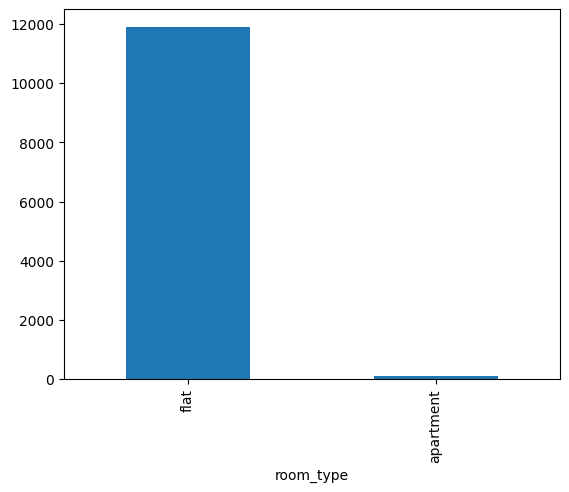

In [2134]:
df['room_type'].value_counts().plot(kind='bar',)

In [2135]:
df['room_type'].value_counts()

room_type
flat         11902
apartment      109
Name: count, dtype: int64

In [2136]:
len(df['room_type'])

12011

In [2137]:
(df['room_type'].value_counts()) / len(df['room_type']) *100

room_type
flat         99.092499
apartment     0.907501
Name: count, dtype: float64

#### Observation
 - flat are in majority 99% and only 1% apartment data hence drop this apartment rows
 - no missing values 

In [2138]:
df = df[df['room_type'] != 'apartment']

In [2139]:
df['room_type'].value_counts()

room_type
flat    11902
Name: count, dtype: int64

In [2140]:
df.to_excel('observation_mg_cleaned_dataset.xlsx')

# project_name      

In [2141]:
df['project_name'].value_counts()

project_name
oberoi sky city                                                   96
piramal vaikunth                                                  90
tata serein                                                       71
omkar alta monte                                                  67
rustomjee crown                                                   66
piramal mahalaxmi                                                 65
kanakia silicon valley                                            59
rustomjee la vie                                                  57
lodha amara                                                       53
dosti eastern bay                                                 51
godrej ascend                                                     50
godrej reserve                                                    49
piramal revanta                                                   46
dosti west county                                                 45
sethia pride         

In [2142]:
df['project_name'].value_counts().shape

(2943,)

In [2143]:
#Let's apply the cumulative sum to check how much data comes from how many project_name.
df['project_name'].value_counts(normalize = True).cumsum().shape

(2943,)

In [2144]:
df['project_name'].value_counts(normalize = True).cumsum().head(317)

project_name
oberoi sky city                                     0.011430
piramal vaikunth                                    0.022145
tata serein                                         0.030599
omkar alta monte                                    0.038576
rustomjee crown                                     0.046434
piramal mahalaxmi                                   0.054173
kanakia silicon valley                              0.061198
rustomjee la vie                                    0.067984
lodha amara                                         0.074295
dosti eastern bay                                   0.080367
godrej ascend                                       0.086320
godrej reserve                                      0.092154
piramal revanta                                     0.097631
dosti west county                                   0.102988
sethia pride                                        0.107870
hiranandani fortune city                            0.112513
lodha woods

In [2145]:
society_counts = df['project_name'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((society_counts >= 50) & (society_counts <= 100)).sum()),
    "Average (10-49)": int(((society_counts >= 10) & (society_counts < 50)).sum()),
    "Low (2-9)": int(((society_counts > 1) & (society_counts < 10)).sum()),
    "Very Low (1)": int((society_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 11,
 'Average (10-49)': 142,
 'Low (2-9)': 1011,
 'Very Low (1)': 1779}

<Axes: xlabel='project_name'>

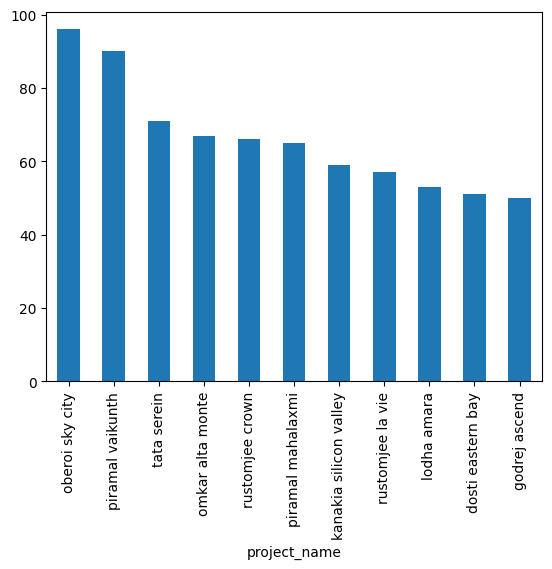

In [2146]:
# top 10 socities
df['project_name'].value_counts().head(11).plot(kind='bar')

In [2147]:
int(df['project_name'].isnull().sum())

3503

#### Observation
- High cardinality feature 
- total 2943 unique project_name   
- The top 317 project_names have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 2626 project_names
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 11 societies have between 50 to 100 listings.
  - Average (10-49): 142 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 1011 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 1779 societies, have only 1 listing.
- Total 3503 missing values 

# price

In [2148]:
df['price'].isnull().sum()

np.int64(0)

In [2149]:
df['price'].describe()

count    11902.000000
mean         2.907779
std          4.237299
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         80.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

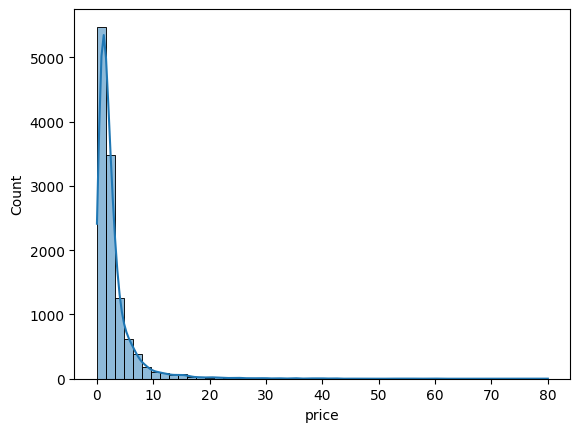

In [2150]:
sns.histplot(df['price'],kde=True,bins=50)

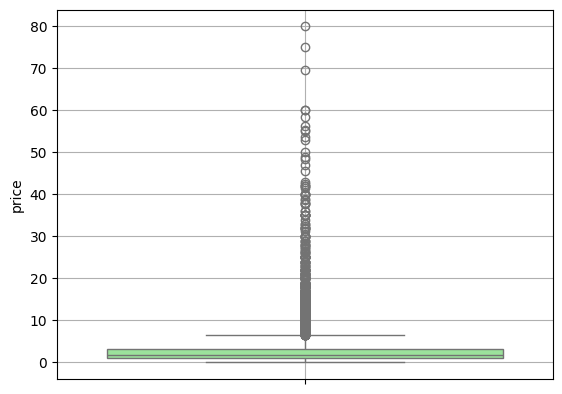

In [2151]:
sns.boxplot(df['price'],color='lightgreen')
plt.grid()

### Observation on price

- Descriptive Statistics:

  - No missing values.
  - Mean Price: The average price is approximately 2.90 crores.
  - Median Price: The median (or 50th percentile) price is 1.78 crores.
  - The standard deviation is 4.24 Cr, indicating significant variation in prices.
  - Range: Prices range from a minimum of 0.01 crores to a maximum of 80 crores.
  - max price is 80 cr and 75 percentile is 3.20cr this clearly indicatie that there is outliers in the data
  - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 3.20 crores.

- Visualizations:
   - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
   - The histogram is right-skewed, indicating most prices are clustered near the lower end (closer to 0).
   - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
   - majority of prices fall within the interquartile range (approximately 0.95–3.2 Cr), with a dense cluster near the median.

#### conclusion and solution:
  - The data has a highly skewed distribution, with a few very high-priced properties influencing the mean and standard deviation.
  - The median (1.78 Cr) is much lower than the mean (2.90 Cr), which further highlights the impact of these high-price outliers.
  - Outlier detection or transformation (e.g., log transformation) may be necessary for further analysis to normalize the data or reduce skewness.

In [2152]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

6.1972959034016295 60.92991331874007


### Observations on Skewness and Kurtosis:

#### 1. **Skewness:**
   - The skewness value is **6.20**, which is highly positive.
   - A positive skewness indicates that the distribution is **right-skewed**:
     - Most values are concentrated on the lower end of the scale (closer to 0).
     - A few very high values (outliers) stretch the tail on the right side, as seen in the histogram and boxplot.

#### 2. **Kurtosis:**
   - The kurtosis value is **60.93**, which is extremely high.
   - High kurtosis indicates a **leptokurtic distribution**(leptokurtic = sample kurtosis -3 > 0 and in leptokurtic we have Heavy tails, sharp peak, more outliers than normal):
     - The distribution has heavy tails and a sharp peak around the mean.
     - This means there are many extreme values (outliers) compared to a normal distribution.

#### conclusion and solution  
The high skewness and kurtosis suggest that the `price` data is far from normally distributed.  
Analytical methods sensitive to non-normality may produce biased results.  
- **Potential Actions:**
- Consider **log transformation** or other scaling techniques to reduce skewness.
- Investigate the outliers for potential anomalies or domain-specific insights.
- Use non-parametric statistical methods (e.g., Mann-Whitney U, Spearman correlation) for hypothesis testing or correlations if normality cannot be assumed.

In [2153]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.20
0.05     0.36
0.95     8.75
0.99    21.00
Name: price, dtype: float64

#### Quantile Analysis:

 - 1% Quantile: Only 1% of properties are priced below 0.20 crores.
 - 5% Quantile: 5% of properties are priced below 0.36 crores.
 - 95% Quantile: 95% of properties are priced below 8.75 crores.
 - 99% Quantile: 99% of properties are priced below 21 crores, indicating that very few properties are priced above this value.

In [2154]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.95
Q3 (75th percentile): 3.2
IQR: 2.25


In [2155]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-2.425 6.575


In [2156]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(989, 47)

In [2157]:
outliers['price'].describe()

count    989.000000
mean      13.047088
std        9.007453
min        6.580000
25%        7.750000
50%        9.800000
75%       14.500000
max       80.000000
Name: price, dtype: float64

- Outliers Analysis (using IQR method):
  - Based on the IQR method, there are 989 properties considered as outliers.  
  - These outliers have an average price of approximately 13.04 crores.  
  - The range for these outliers is from 6.58 crores to 80 crores.  

<Axes: xlabel='price'>

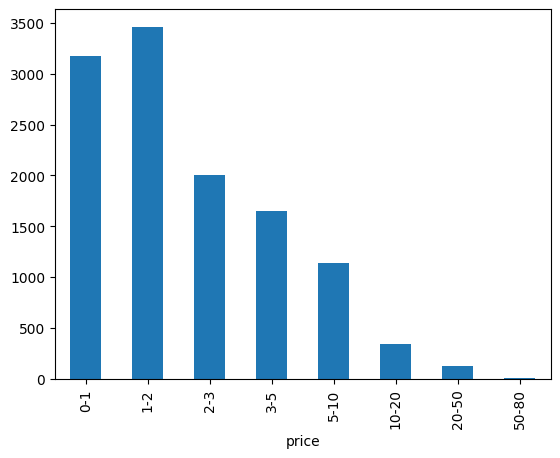

In [2158]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50, 80]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50", "50-80"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2","2-3" and "3-5" crores" ranges.
- There is a noticeable decrease in the number of properties priced above 5 crores.

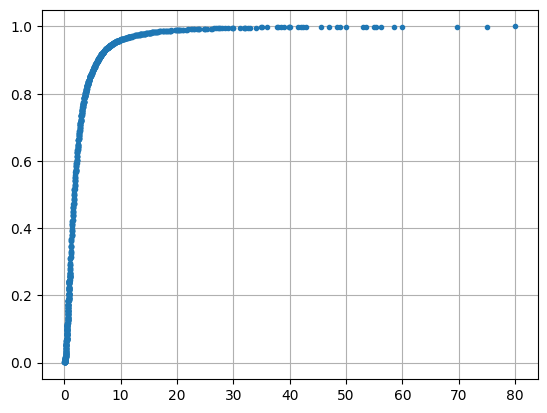

In [2159]:
# ecdf plot(plotting cumulative percentages)
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [2160]:
# Quantile Analysis
quantiles = df['price'].quantile([0.85,0.90])

quantiles

0.85    4.577
0.90    6.000
Name: price, dtype: float64

- 85% properties are below 4.577cr
- 90% properties are below 6cr 

In [2161]:
#apply log transformation as it is right skewed data 

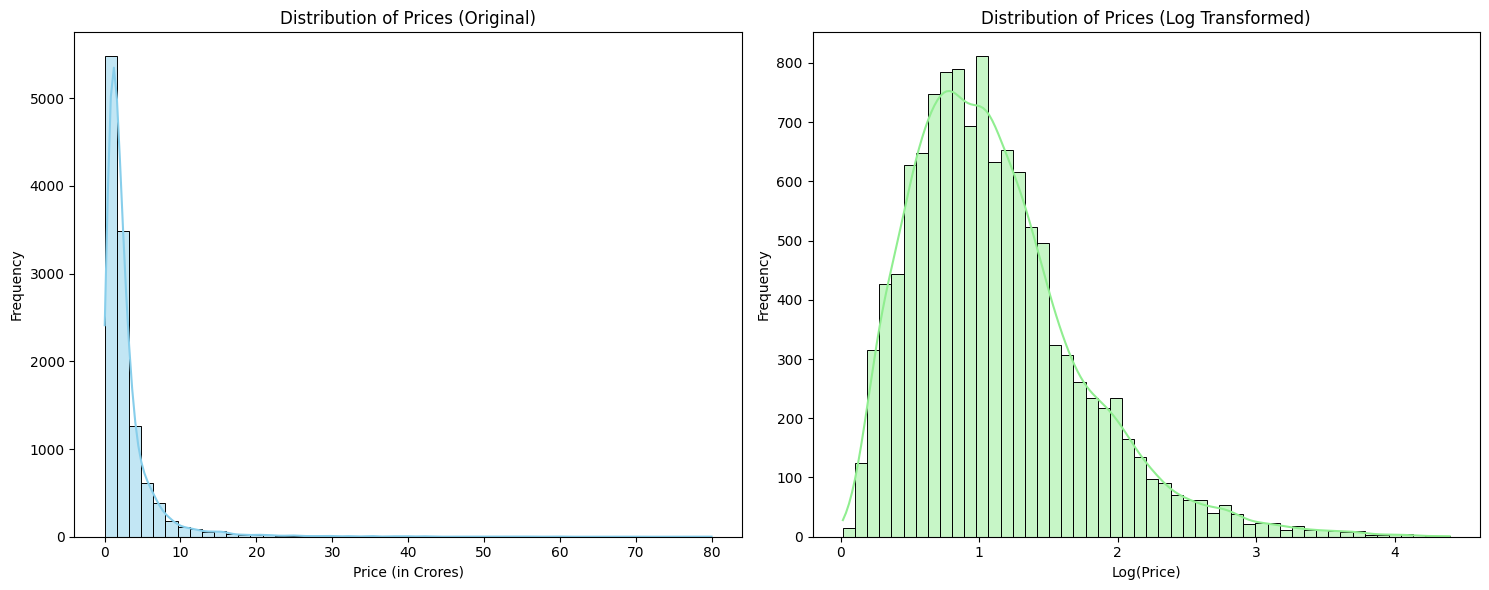

In [2162]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- we use log1p and it means we aare doing this log(1+x) with each values 

### observation
- After applying the logarithmic transformation (log(price)), the distribution becomes closer to normal
- The log transformation reduces the impact of extreme values (outliers) and compresses the wide range of prices into a more manageable scale.

In [2163]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.1021314378039526 1.7186824507621719


### Observation
- after log transformation skewness and kurtosis also get reduced 
- distribution is positively skewed (Acceptable range for near-normal data: −0.5 to 0.5. Beyond this, the data may not be considered symmetric.)
- Kurtosis<3: Light tails so it indicated that it is platykurtic. 
- kurtosis between 2 and 4 is often considered acceptable for near-normal distributions.

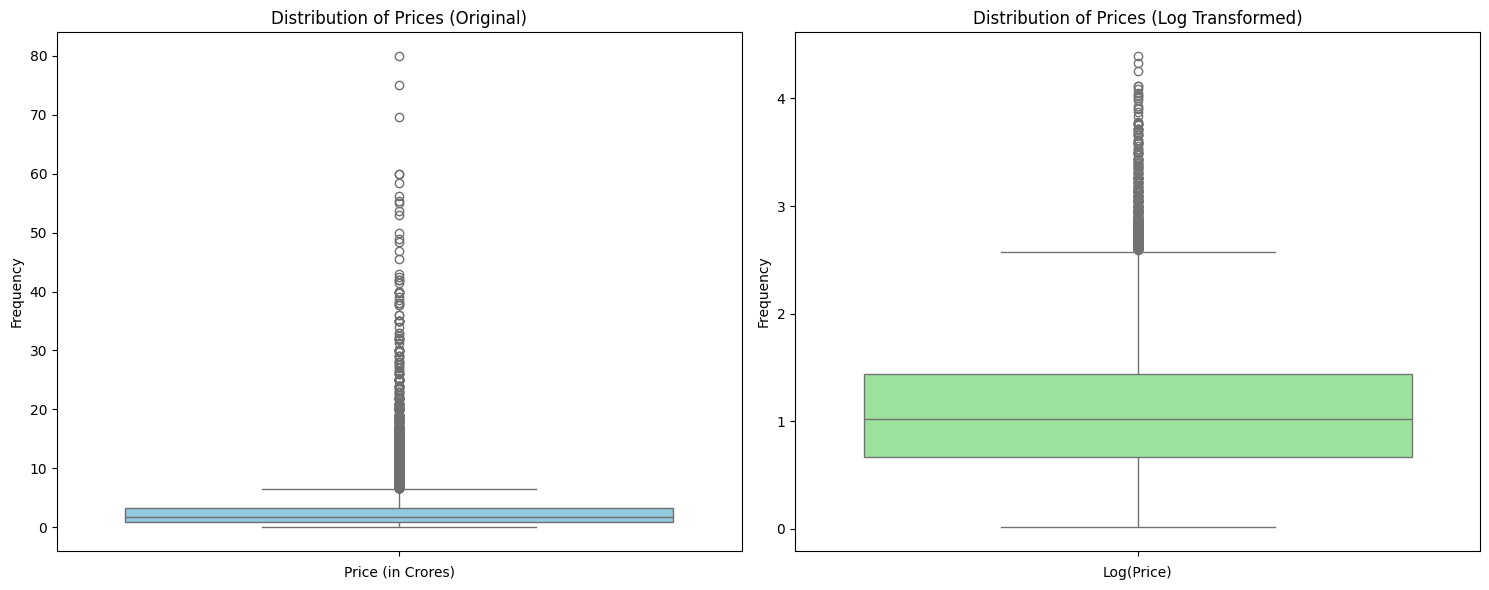

In [2164]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observation

- The original data has a long tail, indicating high skewness. After the log transformation, the distribution becomes more compact and less skewed.
- After the log transformation, the data gets normalized, making the distribution more visible and interpretable.
- The log transformation brings outliers closer to the main data, reducing their impact.

# address region

In [2165]:
df_mumbai = df[df['addressregion'] == 'mumbai']

In [2166]:
df_mumbai['price'].describe()

count    8525.000000
mean        3.550997
std         4.813754
min         0.035000
25%         1.250000
50%         2.200000
75%         3.950000
max        80.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

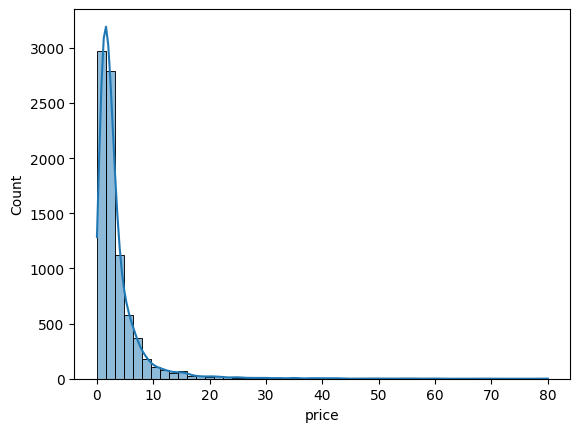

In [2167]:
sns.histplot(df_mumbai['price'], kde=True, bins=50)

In [2168]:
df_navimumbai = df[df['addressregion'] == 'navi mumbai']

In [2169]:
df_navimumbai['price'].describe()

count    1600.000000
mean        1.262289
std         1.060256
min         0.075000
25%         0.540000
50%         0.928500
75%         1.632500
max         9.010000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

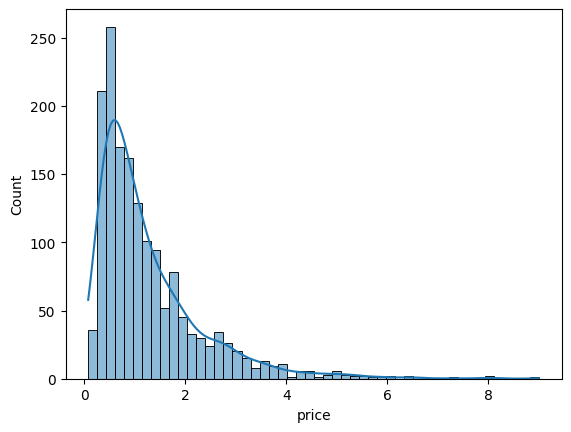

In [2170]:
sns.histplot(df_navimumbai['price'], kde=True, bins=50)

In [2171]:
df_thane = df[df['addressregion'] == 'thane']

In [2172]:
df_thane['price'].describe()

count    1616.000000
mean        1.405818
std         1.037638
min         0.070000
25%         0.700000
50%         1.180000
75%         1.750000
max        10.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

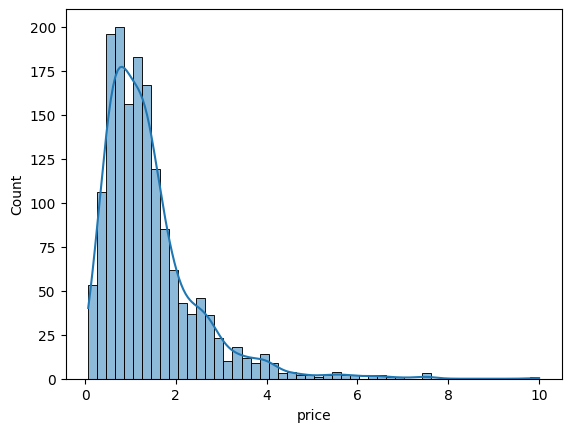

In [2173]:
sns.histplot(df_thane['price'], kde=True, bins=50)

In [2174]:
df_palghar = df[df['addressregion'] == 'palghar']

In [2175]:
df_palghar['price'].describe()

count    161.000000
mean       0.277466
std        0.153432
min        0.017000
25%        0.186000
50%        0.230000
75%        0.320000
max        1.220000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

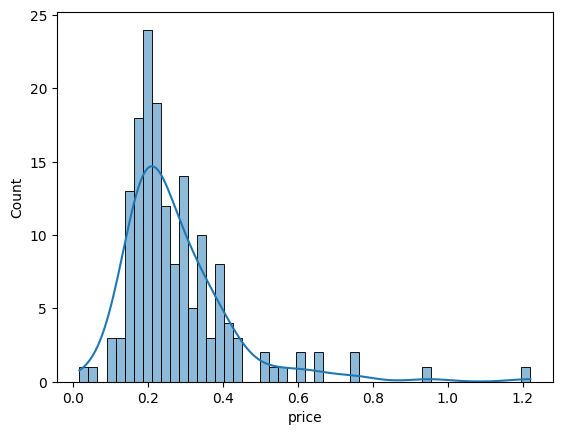

In [2176]:
sns.histplot(df_palghar['price'], kde=True, bins=50)

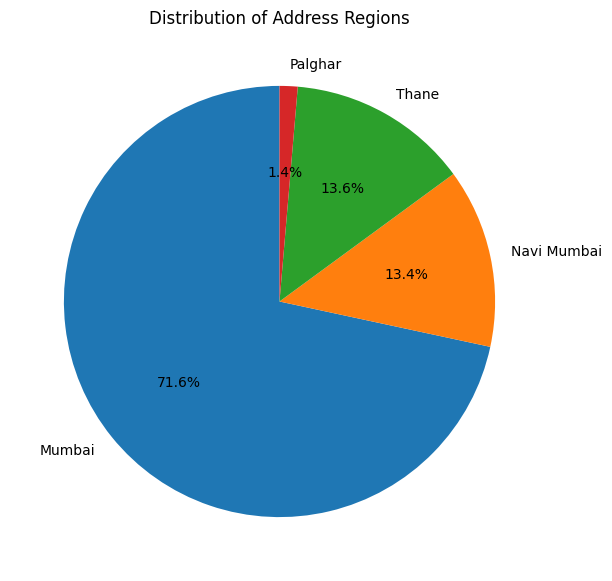

In [2177]:
# Count the number of rows for each region
mumbai_count = df[df['addressregion'] == 'mumbai'].shape[0]
navi_mumbai_count = df[df['addressregion'] == 'navi mumbai'].shape[0]
thane_count = df[df['addressregion'] == 'thane'].shape[0]
palghar_count = df[df['addressregion'] == 'palghar'].shape[0]

# Data for the pie chart
regions = ['Mumbai', 'Navi Mumbai', 'Thane', 'Palghar']
counts = [mumbai_count, navi_mumbai_count, thane_count, palghar_count]

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=regions, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Address Regions')
plt.show()


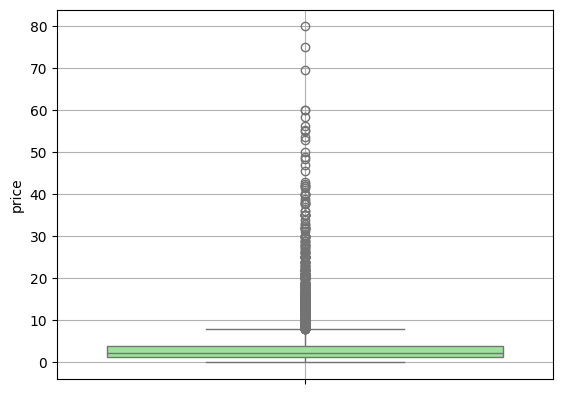

In [2178]:
sns.boxplot(df_mumbai['price'],color='lightgreen')
plt.grid()

In [2179]:
df_mumbai['price'].describe()

count    8525.000000
mean        3.550997
std         4.813754
min         0.035000
25%         1.250000
50%         2.200000
75%         3.950000
max        80.000000
Name: price, dtype: float64

In [2180]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_mumbai['price'], 25)
Q3 = np.percentile(df_mumbai['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 1.25
Q3 (75th percentile): 3.95
IQR: 2.7


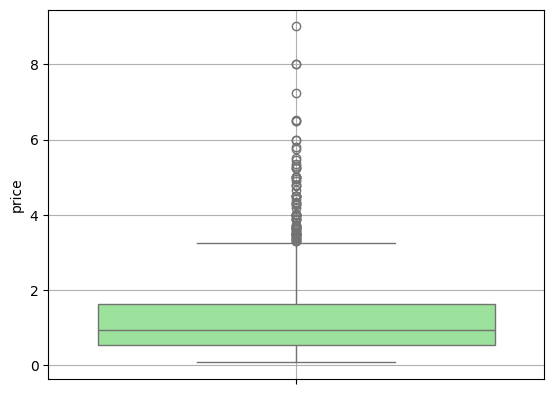

In [2181]:
sns.boxplot(df_navimumbai['price'],color='lightgreen')
plt.grid()

In [2182]:
df_navimumbai['price'].describe()

count    1600.000000
mean        1.262289
std         1.060256
min         0.075000
25%         0.540000
50%         0.928500
75%         1.632500
max         9.010000
Name: price, dtype: float64

In [2183]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_navimumbai['price'], 25)
Q3 = np.percentile(df_navimumbai['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.54
Q3 (75th percentile): 1.6324999999999998
IQR: 1.0924999999999998


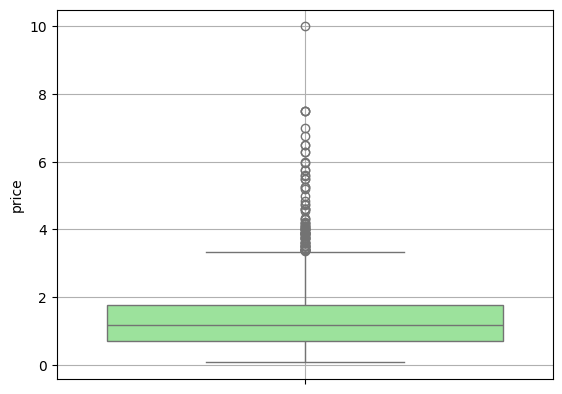

In [2184]:
sns.boxplot(df_thane['price'],color='lightgreen')
plt.grid()

In [2185]:
df_thane['price'].describe()

count    1616.000000
mean        1.405818
std         1.037638
min         0.070000
25%         0.700000
50%         1.180000
75%         1.750000
max        10.000000
Name: price, dtype: float64

In [2186]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_thane['price'], 25)
Q3 = np.percentile(df_thane['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.7
Q3 (75th percentile): 1.75
IQR: 1.05


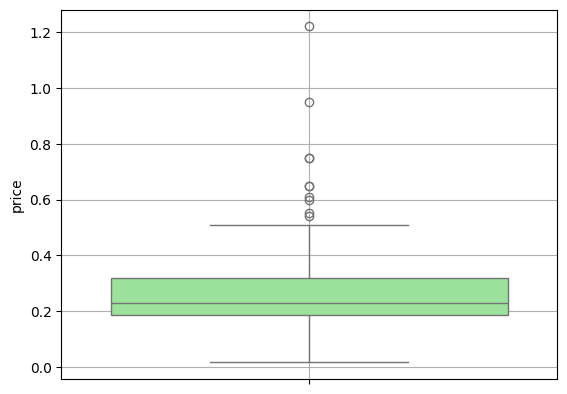

In [2187]:
sns.boxplot(df_palghar['price'],color='lightgreen')
plt.grid()

In [2188]:
df_palghar['price'].describe()

count    161.000000
mean       0.277466
std        0.153432
min        0.017000
25%        0.186000
50%        0.230000
75%        0.320000
max        1.220000
Name: price, dtype: float64

In [2189]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df_palghar['price'], 25)
Q3 = np.percentile(df_palghar['price'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

Q1 (25th percentile): 0.186
Q3 (75th percentile): 0.32
IQR: 0.134


### observation

- mean and median of all regions is different,this means there is prices according to region
    - Mean/median Price:
    - mumbai - 3.55/2.20
    - navi mumbai - 1.26/0.92
    - thane - 1.40/1.18
    - palghar - 0.27/0.23

- mean and median of the palghar properties is almost same indicates that data distribution is relatively symmetric and there are fewer outliers
- most properties fall in this particular region
    - mumbai - 0 to 5 cr
    - navi mumbai and thane - 0 to 2 cr
    - palghar - 0.1 to 0.4 cr

- mumbai : standard deviation greater than the mean indicates high variation, meaning property prices in Mumbai are significantly diverse.
- palghar,thane and navi mumbai : standard deviation less than the mean indicates low variation, meaning property prices are more uniform and predictable.
- Mumbai appears to have more significant outliers on the higher end of the price scale compared to other regions, leading to a higher mean.
- All regions exhibit right-skewed distributions, indicating that most properties fall within lower price ranges, with a few high-priced properties pulling the mean upwards.

##### from box plot
 - In all regions outliers beyond the whiskers of the boxplots.
 - Mumbai: IQR = 1.25, indicating a higher spread in prices compared to other regions.
 - Navi Mumbai: IQR = 0.64, suggesting moderate variability.
 - Thane: IQR = 1.05, showing a higher variability than Navi Mumbai but less than Mumbai.
 - Palghar: IQR = 0.14, the lowest among all, indicating a smaller variation in property prices.
 - The boxplots indicate right-skewed distributions (positive skewness) for all regions, with long tails on the higher side.

#### conclusion

- most of the data is from mumbai region and it can create bias
- mumbai property prices higher than other regions
- prices are according to the region
- expensiveness is like mumbai > thane > navi mumbai > palghar

### Solution:
1. **Address Bias**:
   - Use stratified sampling to ensure balanced representation across regions for analysis.
   - Normalize or standardize property prices to reduce the impact of Mumbai's dominance.

2. **Separate Regional Analysis**:
   - Analyze each region independently to derive region-specific insights.
   - Create separate predictive models or pricing strategies for each region.

3. **Outlier Handling**:
   - Remove or cap extreme outliers to minimize their impact on mean calculations.
   - Focus on the median for central tendency, as it is more robust to outliers.

# costpersqft

In [2190]:
df['costpersqft'].head()

0    28346.0
1    12441.0
2    28892.0
3    23500.0
4    20724.0
Name: costpersqft, dtype: float64

In [2191]:
df['costpersqft'].dtype

dtype('float64')

In [2192]:
#no of missing values in costpersqft column
int(df['costpersqft'].isna().sum())

6

In [2193]:
df['costpersqft'].describe()

count    1.189600e+04
mean     2.826344e+04
std      5.139257e+04
min      1.470000e+02
25%      1.690925e+04
50%      2.557700e+04
75%      3.428600e+04
max      5.333333e+06
Name: costpersqft, dtype: float64

- range of the sqft ranges from 147.00 sqft to  5333333 sqft
- mean is 28263 and median is 25577

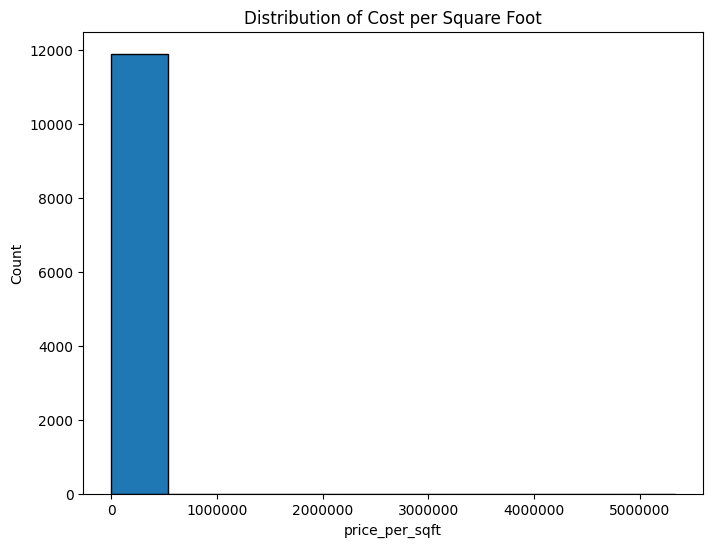

In [2194]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Replace `costpersqft` with your column
plt.figure(figsize=(8, 6))
df['costpersqft'].plot(kind='hist', bins=10, edgecolor='black')

# Set standard x-axis format
plt.ticklabel_format(style='plain', axis='x')

# Add labels and title
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.title('Distribution of Cost per Square Foot')

plt.show()


In [2195]:
# Skewness and Kurtosis
skewness = df['costpersqft'].skew()
kurtosis = df['costpersqft'].kurt()

print(skewness,kurtosis)

92.56504034619053 9547.57394718419


#### Observation

- there are few outliers which affect the whole distribution
- A positive skewness value (like 92.57) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 9547.57) indicates that the distribution has heavy tails and possibly significant outliers.

In [2196]:
#drop outliers
df = df.drop(df[df['costpersqft'].isin([5333333, 208333, 344262, 270543])].index)


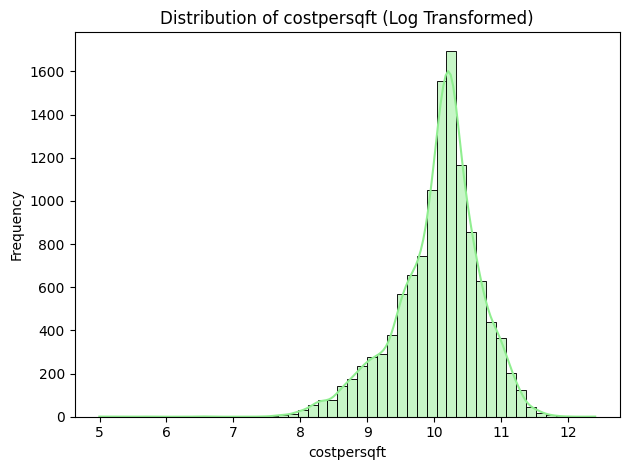

In [2197]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['costpersqft']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of costpersqft (Log Transformed)')
plt.xlabel('costpersqft')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [2198]:
skewness = np.log1p(df['costpersqft']).skew()
kurtosis = np.log1p(df['costpersqft']).kurt()

print(skewness,kurtosis)

-0.744651380223225 1.3659519097173414


### observation

- A skewness of -0.744 suggests that the data is moderately negatively skewed after the log transformation.
- This means the tail on the left side of the distribution (smaller values) is slightly longer than the right side.
- Log transformation has reduced the skewness compared to the original data, which is a common transformation for positively skewed distributions.
- A kurtosis value of 1.366 indicates the distribution is light-tailed compared to a normal distribution (which has a kurtosis of 3).
- This suggests fewer outliers in the transformed data, implying a flatter peak and thinner tails than the normal distribution.

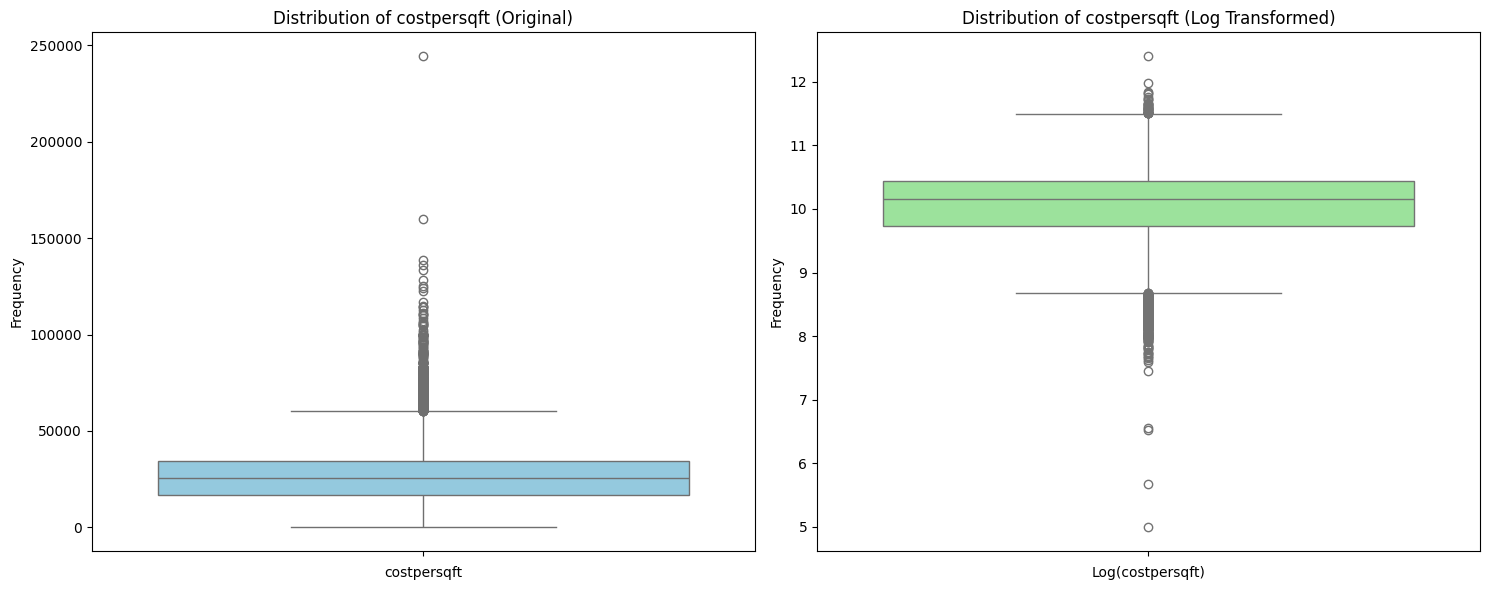

In [2199]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['costpersqft'], color='skyblue')
plt.title('Distribution of costpersqft (Original)')
plt.xlabel('costpersqft')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['costpersqft']), color='lightgreen')
plt.title('Distribution of costpersqft (Log Transformed)')
plt.xlabel('Log(costpersqft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [2200]:
# Drop NaN values from the column
cleaned_data = df['costpersqft'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data, 25)
Q3 = np.percentile(cleaned_data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")


Q1 (25th percentile): 16898.75
Q3 (75th percentile): 34286.0
IQR: 17387.25


In [2201]:
# Quantile Analysis
quantiles = df['costpersqft'].quantile([0.85,0.95])

quantiles

0.85    41667.00
0.95    59141.95
Name: costpersqft, dtype: float64

### Observation
- The boxplot(left) shows significant outliers (data points far above the upper whisker)
- The log transformation(right) reduced the skewness significantly, making the distribution more symmetric.
- However, some outliers are still present, though their effect on the overall distribution has been minimized.

# bed

In [2202]:
df['bed'].head()

0    2.0
1    3.0
2    2.0
3    2.0
4    1.0
Name: bed, dtype: float64

In [2203]:
df['bed'].value_counts()

bed
2.0     4859
1.0     3185
3.0     2898
4.0      757
5.0      127
6.0       55
7.0        8
8.0        5
10.0       4
Name: count, dtype: int64

In [2204]:
df['bed'].isna().sum()

np.int64(0)

<Axes: xlabel='bed'>

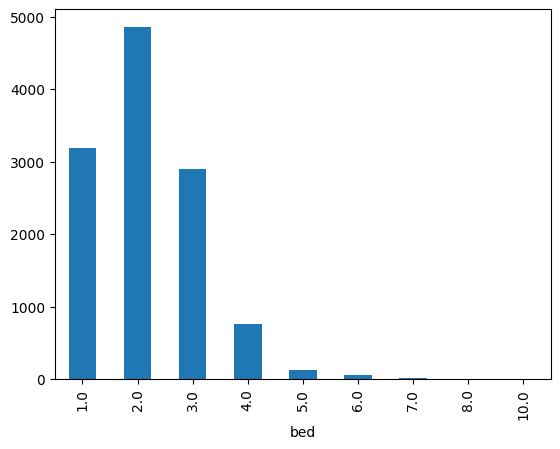

In [2205]:
df['bed'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

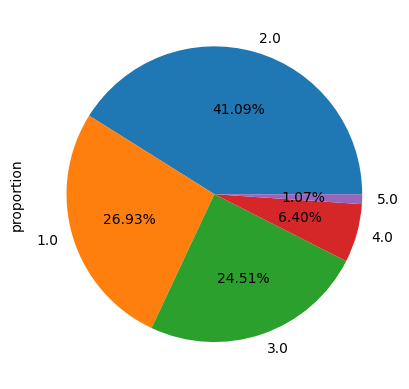

In [2206]:
df['bed'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [2207]:
df['bed'].value_counts(normalize=True).cumsum()

bed
2.0     0.408388
1.0     0.676080
3.0     0.919650
4.0     0.983274
5.0     0.993949
6.0     0.998571
7.0     0.999244
8.0     0.999664
10.0    1.000000
Name: proportion, dtype: float64

### obserbvation 

- no missing values
- 92% of the properties have 1, 2, or 3 bedrooms.

# bath


In [2208]:
df['bath'].head()

0    2.0
1    3.0
2    2.0
3    2.0
4    2.0
Name: bath, dtype: float64

In [2209]:
df['bath'].value_counts()

bath
2.0     6558
3.0     2484
1.0     1653
4.0      781
5.0      278
6.0       88
7.0       11
10.0       7
8.0        7
9.0        1
Name: count, dtype: int64

In [2210]:
df['bath'].isna().sum()

np.int64(30)

<Axes: xlabel='bath'>

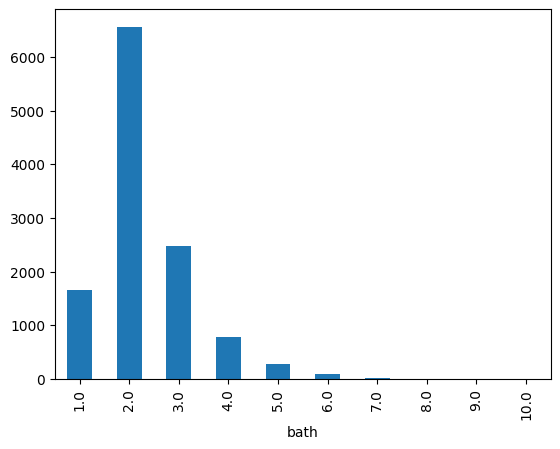

In [2211]:
df['bath'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

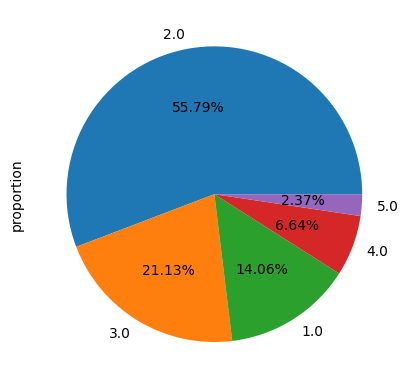

In [2212]:
df['bath'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [2213]:
df['bath'].value_counts(normalize=True).cumsum()

bath
2.0     0.552578
3.0     0.761881
1.0     0.901163
4.0     0.966970
5.0     0.990394
6.0     0.997809
7.0     0.998736
10.0    0.999326
8.0     0.999916
9.0     1.000000
Name: proportion, dtype: float64

### observation

- 30 missing values
- 99% of the properties have 1,2,3,4 and 5 bathrooms.
- 55% properties have 2 bathrooms

# balcony

In [2214]:
df['balcony'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: balcony, dtype: float64

In [2215]:
df['balcony'].value_counts()

balcony
1.0    3063
2.0    1468
3.0    1101
4.0     332
5.0      76
6.0      21
7.0       7
8.0       4
Name: count, dtype: int64

In [2216]:
df['balcony'].isnull().sum()

np.int64(5826)

<Axes: xlabel='balcony'>

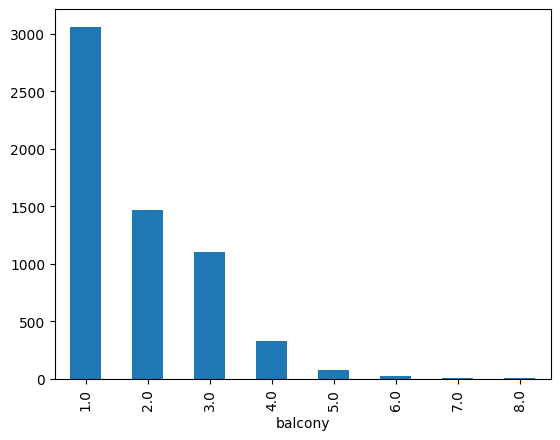

In [2217]:
df['balcony'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

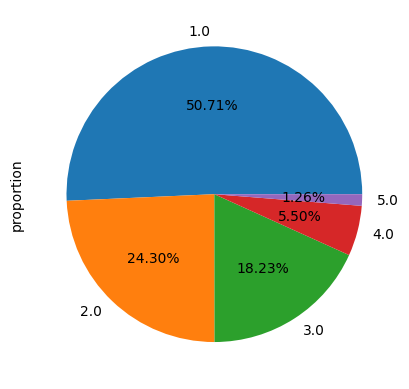

In [2218]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [2219]:
df['balcony'].value_counts(normalize=True).cumsum()

balcony
1.0    0.504447
2.0    0.746212
3.0    0.927536
4.0    0.982213
5.0    0.994730
6.0    0.998188
7.0    0.999341
8.0    1.000000
Name: proportion, dtype: float64

### observation
- 5826 missing values
- 99% of the properties have 1,2,3,4 and 5 balconies.
- 50% properties have 1 balcony 

# parking

In [2281]:
df['parking'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: parking, dtype: float64

In [2282]:
df['parking'].value_counts()

parking
1.0     3958
2.0     1350
3.0      243
4.0       82
5.0       17
6.0        7
10.0       1
9.0        1
12.0       1
8.0        1
Name: count, dtype: int64

In [2283]:
df['parking'].isna().sum()

np.int64(6237)

<Axes: xlabel='parking'>

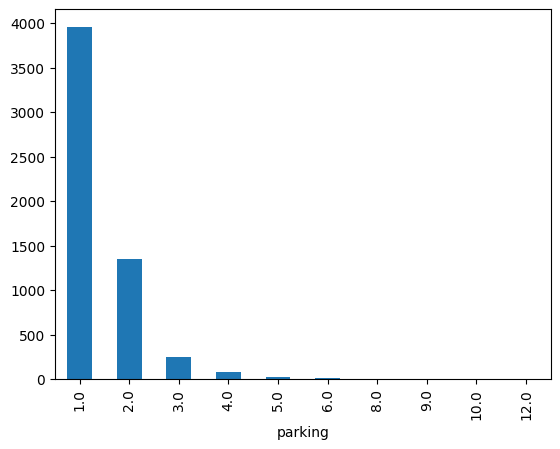

In [2284]:
df['parking'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

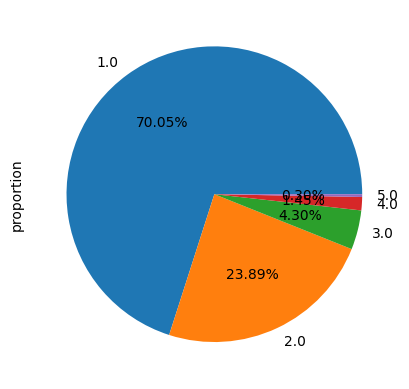

In [2285]:
df['parking'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### observation
- 6237 missing values
- 70% of properties have only 1 parking followed by 23.89% properties have 2 parking
- feature engineering of the categories which has value_counts less than 7

# available_units

In [2220]:
df['available_units'].head()

0    1512.0
1     810.0
2     412.0
3     339.0
4     174.0
Name: available_units, dtype: float64

In [2221]:
df['available_units'].describe()

count     6672.000000
mean       465.644934
std       1086.089688
min          6.000000
25%        120.000000
50%        282.000000
75%        550.000000
max      40000.000000
Name: available_units, dtype: float64

In [2222]:
df['available_units'].isna().sum()

np.int64(5226)

C:\Users\ABC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<Axes: xlabel='available_units', ylabel='Count'>

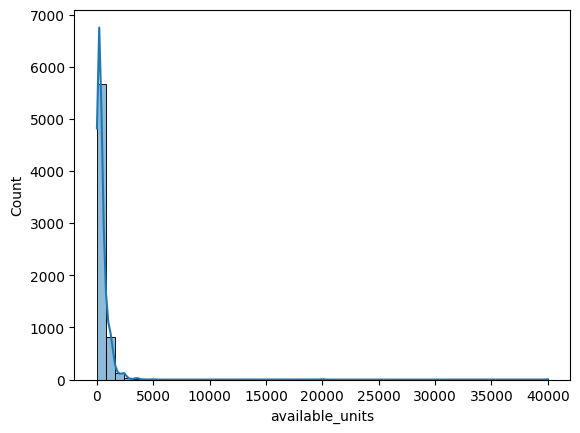

In [2223]:
sns.histplot(df['available_units'],kde=True,bins=50)

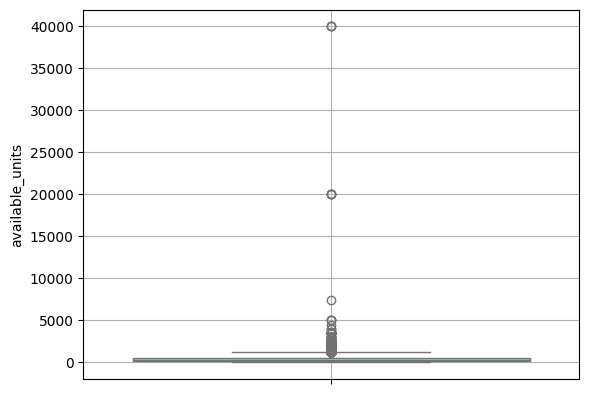

In [2224]:
sns.boxplot(df['available_units'],color='lightgreen')
plt.grid()

In [2225]:
# Skewness and Kurtosis
skewness = df['available_units'].skew()
kurtosis = df['available_units'].kurt()

print(skewness,kurtosis)

25.46303296979051 850.8755981748383


#### Observation


- there are few outliers which affect the whole distribution
- A positive skewness value (like 25.46) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 850.87) indicates that the distribution has heavy tails and possibly significant outliers.

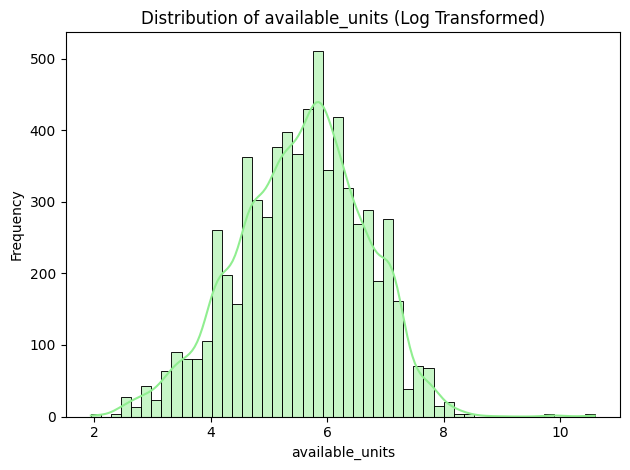

In [2226]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['available_units']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of available_units (Log Transformed)')
plt.xlabel('available_units')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [2227]:
skewness = np.log1p(df['available_units']).skew()
kurtosis = np.log1p(df['available_units']).kurt()

print(skewness,kurtosis)

-0.16552145576745805 0.029543952670652462


# observation

- 5226 missing values
- A skewness of -0.166 indicates that the data is nearly symmetric after the log transformation.
- A kurtosis of 0.030 is very close to 0, indicating that the distribution is neither heavily tailed nor strongly peaked.

# tower

In [2228]:
df['towers'].head()

0    10.0
1     6.0
2     2.0
3     1.0
4     1.0
Name: towers, dtype: float64

In [2229]:
df['towers'].value_counts()

towers
1.0      1991
2.0      1191
3.0      1057
5.0       489
4.0       475
6.0       429
8.0       322
7.0       151
9.0       115
15.0      110
11.0       79
20.0       56
10.0       54
12.0       51
16.0       37
28.0       31
14.0       29
19.0       25
13.0       23
17.0       20
25.0       15
40.0       15
22.0       13
27.0       10
34.0       10
90.0        9
18.0        8
24.0        7
31.0        5
30.0        5
21.0        4
56.0        4
26.0        4
38.0        4
36.0        3
55.0        3
100.0       3
23.0        2
45.0        2
200.0       1
42.0        1
35.0        1
Name: count, dtype: int64

In [2230]:
df['towers'].isna().sum()

np.int64(5034)

<Axes: xlabel='towers', ylabel='Count'>

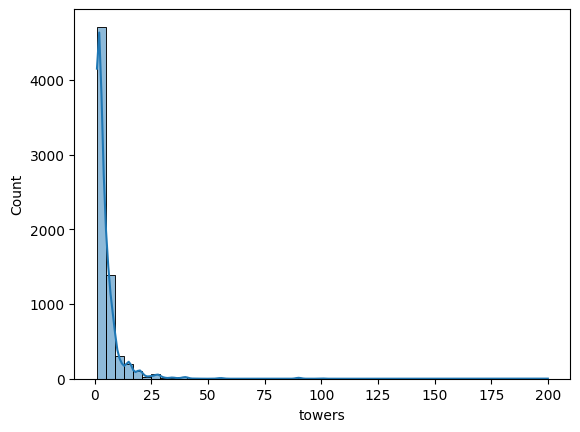

In [2231]:
sns.histplot(df['towers'], kde=True, bins =50)

<Axes: xlabel='towers'>

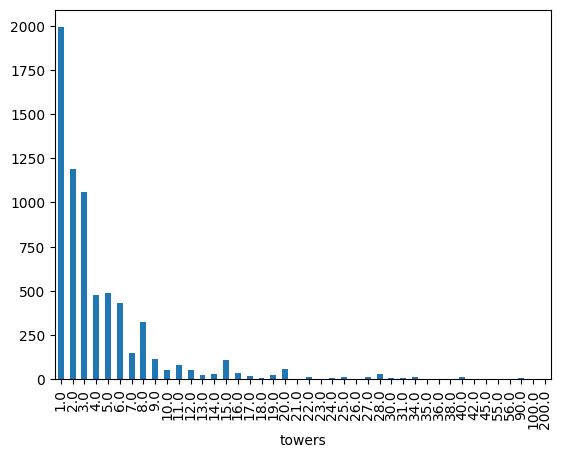

In [2232]:
df['towers'].value_counts().sort_index().plot(kind='bar')

### observation

- 5034 missing values
- most of the builders make less than 20 towers
- The highest frequency is observed for lower values of towers (e.g., 1, 2, or 3 towers).
- As the number of towers increases, the frequency decreases significantly.
- The distribution is right-skewed.

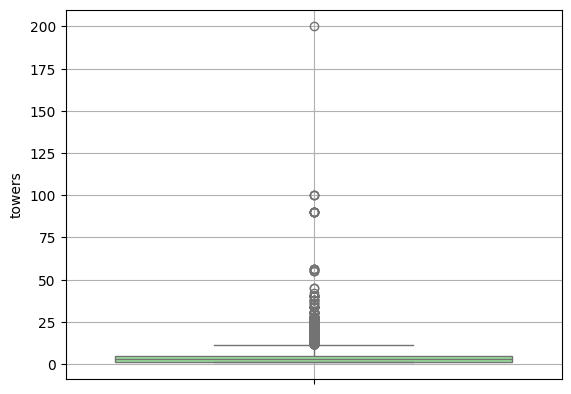

In [2233]:
sns.boxplot(df['towers'] , color = 'lightgreen' )
plt.grid()

In [2234]:
#skewness and kurtosis
skewness = df['towers'].skew()
kurtosis = df['towers'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 8.474374828937183
kurtosis : 141.8690163403883


### Observation

- there are few outliers which affect the whole distribution
- A positive skewness value (like 8.47) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 141.86) indicates that the distribution has heavy tails and possibly significant outliers.

# locality_rank

In [2235]:
df['locality_rank'].head()

0     14.0
1     11.0
2    401.0
3    118.0
4    376.0
Name: locality_rank, dtype: float64

In [2236]:
df['locality_rank'].value_counts()

locality_rank
186.0    412
4.0      371
46.0     336
8.0      301
155.0    291
92.0     277
11.0     266
230.0    245
102.0    239
236.0    238
170.0    232
7.0      219
126.0    213
16.0     209
3.0      200
17.0     199
239.0    189
408.0    181
269.0    180
127.0    164
13.0     133
232.0    124
12.0     122
135.0    116
1.0      112
22.0     102
68.0     100
48.0      92
77.0      90
318.0     84
83.0      81
133.0     79
43.0      71
131.0     63
484.0     59
401.0     57
29.0      56
2.0       55
34.0      51
121.0     51
40.0      50
132.0     48
128.0     46
5.0       44
193.0     41
18.0      40
9.0       36
474.0     36
14.0      35
54.0      31
19.0      31
24.0      30
15.0      30
37.0      30
322.0     30
6.0       28
539.0     28
130.0     25
475.0     24
45.0      24
187.0     24
512.0     24
39.0      23
36.0      23
277.0     21
53.0      18
260.0     18
118.0     17
85.0      17
524.0     17
499.0     16
441.0     15
483.0     15
25.0      15
35.0      15
20.0      1

In [2237]:
df['locality_rank'].isna().sum()

np.int64(3839)

In [2238]:
df['locality_rank'].describe()

count    8059.000000
mean      122.383422
std       126.504555
min         1.000000
25%        16.000000
50%        92.000000
75%       186.000000
max       839.000000
Name: locality_rank, dtype: float64

### observation
- 3839 missing values
- Min rank is 1, max is 839.  
- Mean rank is 122.38, median is 92 (right-skewed).  
- 25% of localities have ranks ≤ 16; 50% ≤ 92.  
- Standard deviation is 126.50; high variability.  
- Data covers 1–839 ranks out of 3015 total ranks.  

<Axes: xlabel='locality_rank', ylabel='Count'>

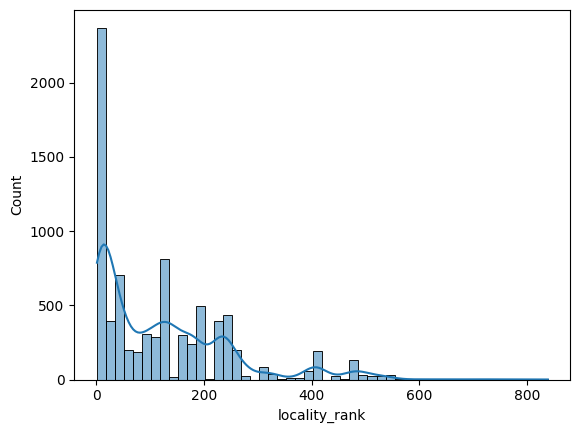

In [2239]:
sns.histplot(df['locality_rank'],kde=True,bins=50)

### observation

- The distribution is right-skewed, with most localities having lower ranks.
- A significant number of localities have ranks close to 1–50.
- Ranks above 200 are relatively sparse, with a gradual decline towards the maximum rank (839).
- The highest frequency is observed for ranks near 1.
- The presence of multiple peaks indicates possible clustering in locality ranks.

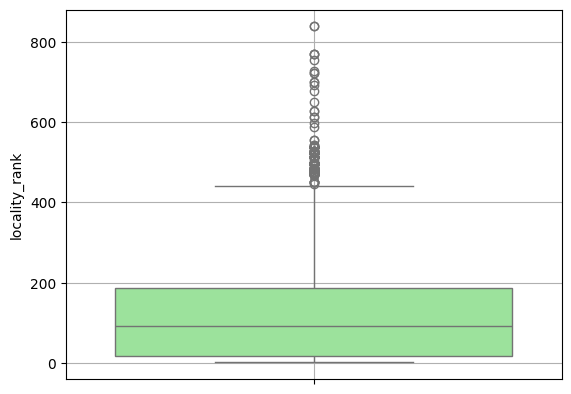

In [2240]:
sns.boxplot(df['locality_rank'],color='lightgreen')
plt.grid()

### observations
- The IQR (green box) lies between ranks 16 and 186.
- The median rank is approximately 92.
- Ranks above 400 are outliers, with a few reaching the maximum rank (839).
- The distribution is right-skewed, as evident from the longer whisker on the upper side.
- Most data points are concentrated in the lower rank range (1–200).

In [2241]:
#skewness and kurtosis
skewness = df['locality_rank'].skew()
kurtosis = df['locality_rank'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : 1.39848511098006
kurtosis : 1.9973850618338678


- Skewness (1.398): The data is positively skewed, with a longer tail on the right.  
- Most locality ranks are concentrated at lower values.
- Kurtosis (1.997): The distribution has light tails compared to a normal distribution (kurtosis < 3).  
- Indicates fewer extreme outliers than a heavy-tailed distribution.  

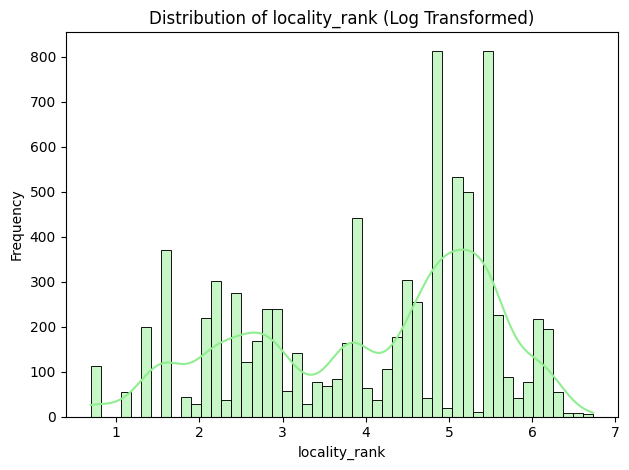

In [2242]:
# Distribution plot with log transformation
sns.histplot(np.log1p(df['locality_rank']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of locality_rank (Log Transformed)')
plt.xlabel('locality_rank')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observations 
- The log transformation reduces skewness, making the distribution more symmetric.
- Peaks are observed around log values 2–5, indicating clustering in these ranges.
- Outliers in the original data are compressed, improving interpretability.
- The spread of ranks is now more balanced, highlighting patterns in the middle range.
- The transformation emphasizes the lower ranks, previously overshadowed by the skewness.

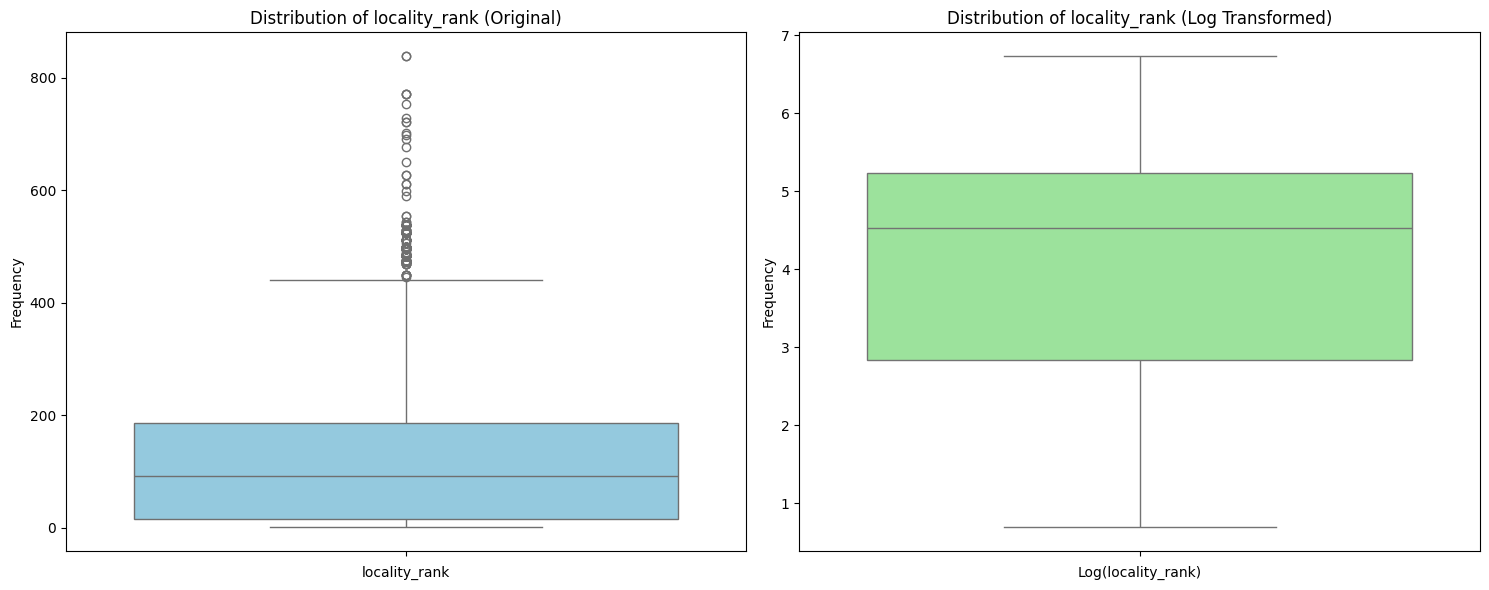

In [2243]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['locality_rank'], color='skyblue')
plt.title('Distribution of locality_rank (Original)')
plt.xlabel('locality_rank')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['locality_rank']), color='lightgreen')
plt.title('Distribution of locality_rank (Log Transformed)')
plt.xlabel('Log(locality_rank)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### observation

- The data shows a right-skewed distribution with many outliers above the upper whisker.
- Most values are concentrated in the lower range.
- The logarithmic transformation reduces skewness and compresses extreme values, resulting in a more symmetric distribution with fewer visible outliers.

In [2244]:
skewness = np.log1p(df['locality_rank']).skew()
kurtosis = np.log1p(df['locality_rank']).kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -0.4851451513358241
kurtosis : -0.9468942016046178


### observation

- A skewness value close to 0 indicates that the data is nearly symmetric.
- The slight negative value suggests a minor left-skewed distribution.
- A negative kurtosis indicates that the distribution is flatter than a normal distribution (platykurtic), with lighter tails and fewer extreme outliers.

# locality_url_rating

In [2245]:
df['locality_rating'].head()

0    3.9
1    4.1
2    4.4
3    3.8
4    3.5
Name: locality_rating, dtype: float64

In [2246]:
df['locality_rating'].isna().sum()

np.int64(467)

In [2247]:
df['locality_rating'].value_counts()

locality_rating
4.1    2021
4.0    1952
3.9    1535
4.2    1366
3.8    1127
0.0     809
4.4     631
4.3     544
3.7     414
4.5     297
3.3     204
4.7     113
4.6      96
3.5      76
3.6      71
3.4      63
5.0      49
4.8      38
3.0       7
3.1       5
3.2       4
4.9       4
1.7       2
2.6       1
2.4       1
2.7       1
Name: count, dtype: int64

In [2248]:
df['locality_rating'].describe()

count    11431.000000
mean         3.759374
std          1.067648
min          0.000000
25%          3.900000
50%          4.000000
75%          4.200000
max          5.000000
Name: locality_rating, dtype: float64

### observation
- 467 missing values
- Min locality_rating is 0, max is 5.  
- Mean locality_rating is 3.75, median is 4
- 25% of locality_rating have rating ≤ 3.90; 50% ≤ 4.0.  
- Standard deviation is 1.06; indicating moderate to high variability in ratings.
- Data covers 0–5 continuous rating out of 5 rating.  

<Axes: xlabel='locality_rating'>

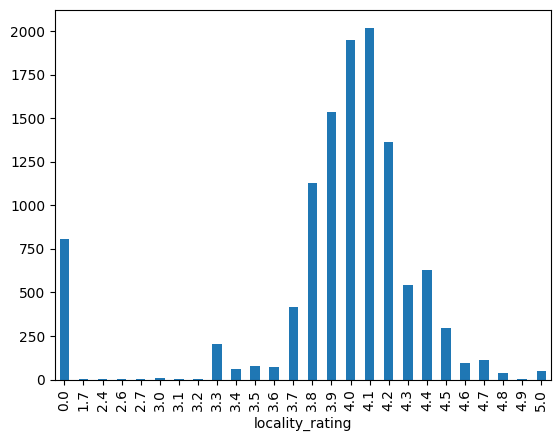

In [2249]:
df['locality_rating'].value_counts().sort_index().plot(kind='bar')

### observation

- The ratings are concentrated between 3.8 and 4.3, with a peak at 4.0-4.1.
- The distribution is slightly left-skewed, indicating more high ratings than low.
- Outliers at extremes (e.g., 0.0, 1.0, >4.8) are minimal and infrequent.

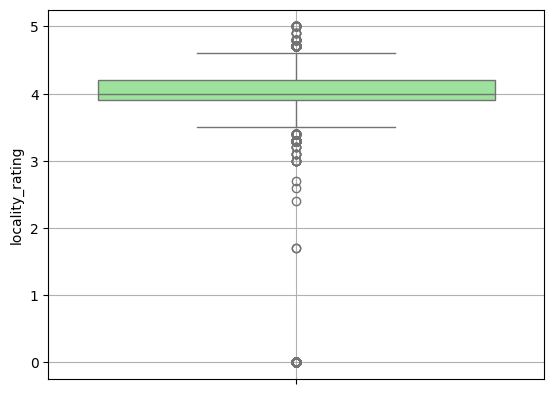

In [2250]:
sns.boxplot(df['locality_rating'],color='lightgreen')
plt.grid()

In [2251]:
# Drop NaN values from the column
cleaned_data_locality_rating = df['locality_rating'].dropna()

# Calculate Q1 and Q3
Q1 = np.percentile(cleaned_data_locality_rating, 25)
Q3 = np.percentile(cleaned_data_locality_rating, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")

print("Lower Whisker:", lower_whisker)
print("Upper Whisker:", upper_whisker)


Q1 (25th percentile): 3.9
Q3 (75th percentile): 4.2
IQR: 0.30000000000000027
Lower Whisker: 3.4499999999999993
Upper Whisker: 4.65


In [2252]:
# Quantile Analysis
quantiles = df['locality_rating'].quantile([0.30,0.95])

quantiles

0.30    3.9
0.95    4.5
Name: locality_rating, dtype: float64

### observation 

- the iqr green box lies between 3.90 and 4(50% data)
- the median rank is 4.00
- rating below 3.5 and above 4.65 are outliers
- iqr 0.3 indicate middle 50% of the ratings are tightly clustered, suggesting low variability in this range.
- The distribution is left-skewed, as slightly longer whisker from the lower side

In [2253]:
#skewness and kurtosis
skewness = df['locality_rating'].skew()
kurtosis = df['locality_rating'].kurt()

print(f"skewness : {skewness}")
print(f"kurtosis : {kurtosis}")

skewness : -3.0300539835700486
kurtosis : 7.931891980257675


### observation
- -3.03 negative skewness indicates strong left-skewed distribution caused by small number of low ratings pulling the tail to the left
- kurtosis > 3 leptokurtic distribution. This reflects a sharp peak and heavy tails, meaning there are more extreme values (outliers) compared to a normal distribution.
- try to apply transformations like reglection transform ,power transform,Box-Cox or Yeo-Johnson Transform

# construction

In [2254]:
df['construction'].head()

0    under construction
1    under construction
2    under construction
3    under construction
4    under construction
Name: construction, dtype: object

In [2255]:
df['construction'].isna().sum()

np.int64(1063)

In [2256]:
df['construction'].value_counts()

construction
under construction    4558
less than 5 years     1508
new construction      1467
5 to 10 years         1405
10 to 15 years         944
above 20 years         495
15 to 20 years         458
Name: count, dtype: int64

<Axes: xlabel='construction'>

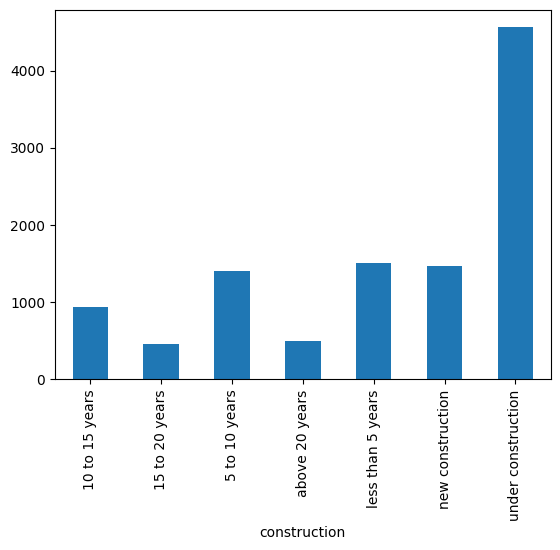

In [2257]:
df['construction'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

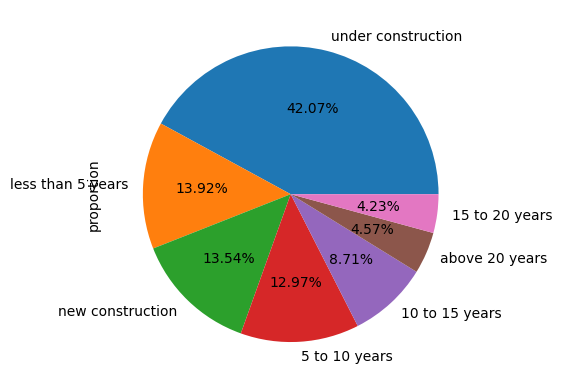

In [2258]:
df['construction'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [2259]:
df['construction'].notna().sum()

np.int64(10835)

In [2260]:
df[df['construction'] == 'less than 5 years'].shape

(1508, 47)

In [2261]:
df[df['construction'] == 'under construction'].shape

(4558, 47)

In [2262]:
df[df['construction'] == 'new construction'].shape

(1467, 47)

In [2263]:
df[df['construction'] == '5 to 10 years'].shape[0] + df[df['construction'] == '10 to 15 years'].shape[0] +df[df['construction'] == 'above 20 years'].shape[0] + df[df['construction'] == '15 to 20 years'].shape[0]

3302

# observation 
- 1063 missing values
- 3302 properties are older more than 5 years
- 1508 properties older less than 5 years
- 4558 are under construction properties
- 1467 are new construction properties
- 42% properties are under construction and all other are completed properties
- make above 10 years as separate category 

# overlooking 

In [2264]:
df['overlooking'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: overlooking, dtype: object

In [2265]:
df['overlooking'].isna().sum()

np.int64(3969)

In [2266]:
df['overlooking'].value_counts()

overlooking
main road                       2240
garden/park, main road          1790
garden/park, main road, pool    1749
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
main road, not available           2
Name: count, dtype: int64

<Axes: xlabel='overlooking'>

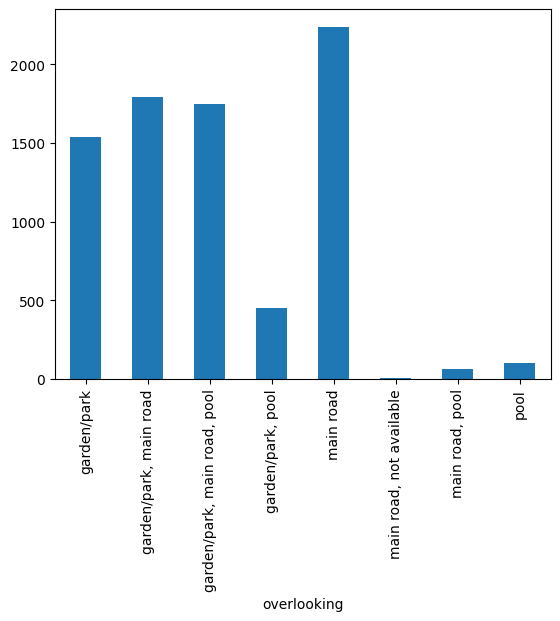

In [2267]:
df['overlooking'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

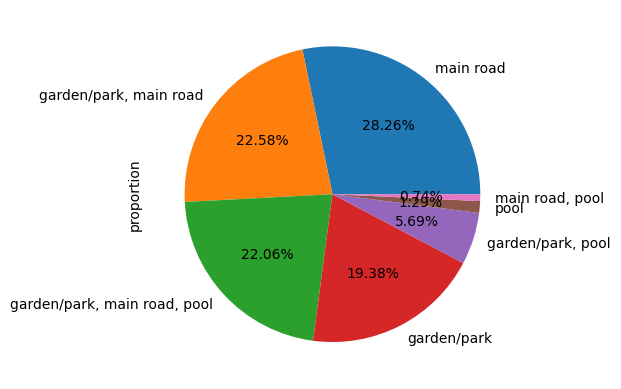

In [2268]:
df['overlooking'].value_counts(normalize=True).head(7).plot(kind='pie',autopct='%0.2f%%')

# observation
- 3969 missing values
- main road and garden/park are the most common "overlooking" categories
- make 5th category as other(pool) which can have this combination garden/park, pool or main road, pool

# ownership

In [2269]:
df['ownership'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ownership, dtype: object

In [2270]:
df['ownership'].value_counts()

ownership
freehold                5921
co-operative society    2021
leasehold                317
power of attorney         28
Name: count, dtype: int64

In [2271]:
df['ownership'].isna().sum()

np.int64(3611)

<Axes: xlabel='ownership'>

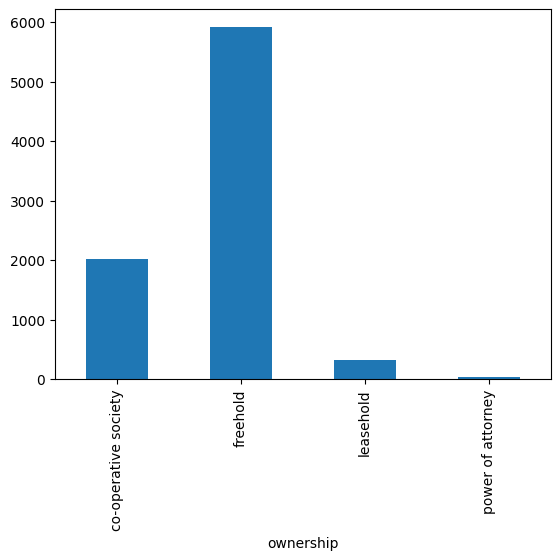

In [2272]:
df['ownership'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

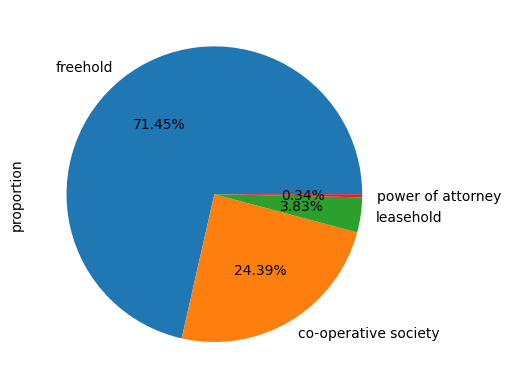

In [2273]:
df['ownership'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

- freehold - owner has complete ownership of both the building and the land it is built on.
- leasehold - buyer owns the building but not the land it is built on.the land is leased from a landlord (often referred to as the freeholder) for a specific period, typically ranging from 30 to 99 years or more.
- Co-operative society in property ownership refers to a housing arrangement where the property (e.g., an apartment building) is owned and managed by a co-operative society
- Power of Attorney (PoA) in property allows a person (the principal) to authorize another (the agent) to manage, sell, lease, or transfer property on their behalf, without granting ownership.

### observation

- 3611 missing values
- most of the properties are from freehold properties 71.45% followed by the co-op society 

# extra_rooms

In [2274]:
df['extra_rooms'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: extra_rooms, dtype: object

In [2275]:
df['extra_rooms'].value_counts()

extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

In [2276]:
df['extra_rooms'].isna().sum()

np.int64(5300)

<Axes: xlabel='extra_rooms'>

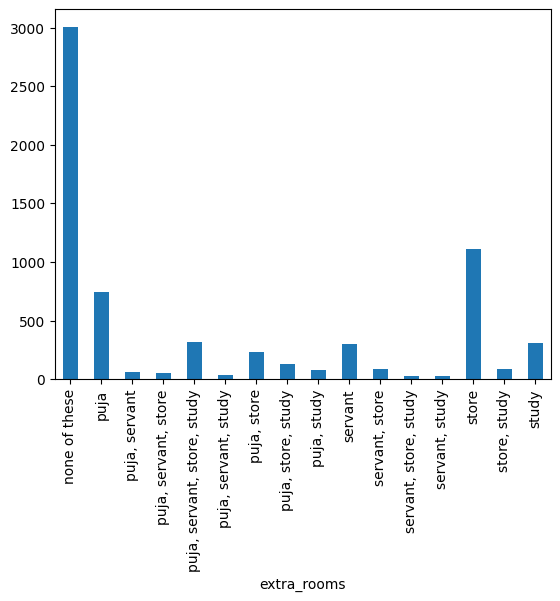

In [2277]:
df['extra_rooms'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

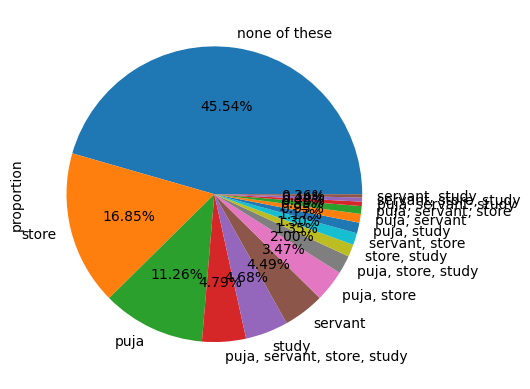

In [2278]:
df['extra_rooms'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

In [2280]:
import pandas as pd

# Sample data
data = {
    'rooms': [
        'none of these', 'store', 'puja', 'puja, servant, store, study', 'study',
        'servant', 'puja, store', 'puja, store, study', 'store, study', 'servant, store',
        'puja, study', 'puja, servant', 'puja, servant, store', 'puja, servant, study',
        'servant, store, study', 'servant, study'
    ],
    'count': [
        3005, 1112, 743, 316, 309, 296, 229, 132, 89, 86, 77, 63, 56, 32, 29, 24
    ]
}

df1 = pd.DataFrame(data)

# Splitting each 'rooms' entry into individual rooms and summing the counts
room_counts = {}

for index, row in df1.iterrows():
    rooms = row['rooms'].split(', ')
    count = row['count']
    
    for room in rooms:
        if room not in room_counts:
            room_counts[room] = 0
        room_counts[room] += count

# Displaying the final counts for each room
room_counts_df = pd.DataFrame(list(room_counts.items()), columns=['room', 'total_count']).sort_values(by='total_count', ascending=False)
print(room_counts_df)


            room  total_count
0  none of these         3005
1          store         2049
2           puja         1648
4          study         1008
3        servant          902


### observation
- 5300 missing values
- 45.54% properties dont have extra rooms
- most properties have store room followed by puja,study,servant
- feature engineering for this column eg: puja,servant so consider this as 2 rooms 

# builder

In [2286]:
df['builder'].head()

0                 raymond realty
1                 paradise group
2    n rose developers pvt. ltd.
3                    avant group
4                        mj shah
Name: builder, dtype: object

In [2287]:
df['builder'].value_counts()

builder
lodha                                                             452
godrej properties                                                 277
piramal realty                                                    227
oberoi realty ltd.                                                199
rustomjee                                                         184
runwal group                                                      144
kalpataru ltd.                                                    138
dosti realty                                                      131
hiranandani group                                                 120
l & t realty                                                       98
kanakia spaces realty pvt. ltd.                                    92
cooperative group housing society                                  86
omkar realtors and developers pvt. ltd.                            83
ashwin sheth group                                                 74
tata housing

In [2288]:
df['builder'].isna().sum()

np.int64(4281)

### observation 
- 4282 missing values 